In [87]:
import scipy.io
import os, os.path, shutil
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
from keras import backend as K 

In [2]:
path = Path("C:/Users/acalderon/Downloads/SAT-4_and_SAT-6_datasets.tar/SAT-4_and_SAT-6_datasets/sat-6-full.mat")
mat = scipy.io.loadmat(path)

In [17]:
train_x = mat['train_x']
train_x.shape

(28, 28, 4, 324000)

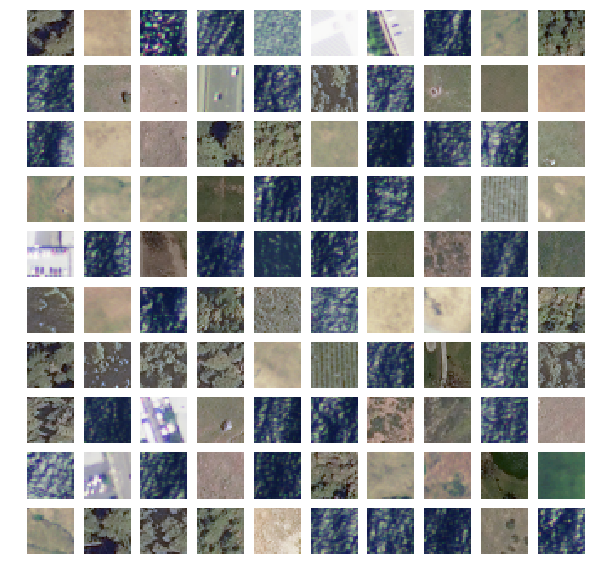

In [50]:
plt.rcParams['figure.figsize'] = (10,10)
    
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(train_x[:,:,0:3,i])
    plt.axis('off')

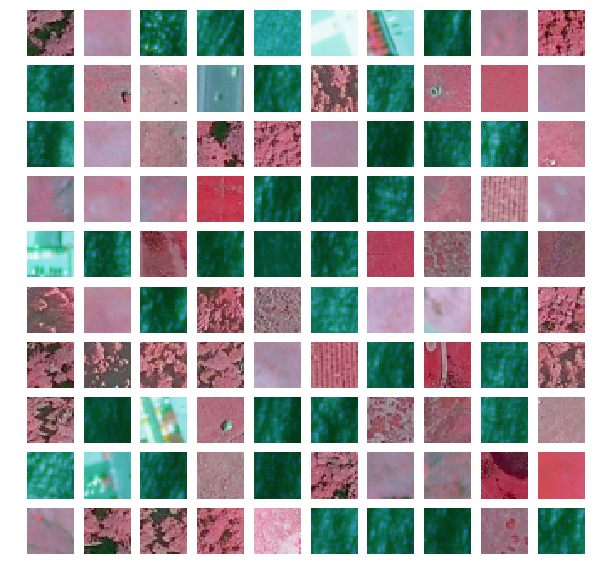

In [51]:
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(train_x[:,:,[3,2,1],i])
    plt.axis('off')

In [68]:
train_y = mat['train_y']
train_y.shape

(6, 324000)

In [74]:
annotations = mat['annotations']
a = {}
for k, v in annotations:
    a[k[0]] = v[0] 
for i in range(10):
    k = ''.join(str(x) for x in train_y[:,i])
    print(a[k])

trees
barren land
water
water
water
building
building
water
barren land
trees


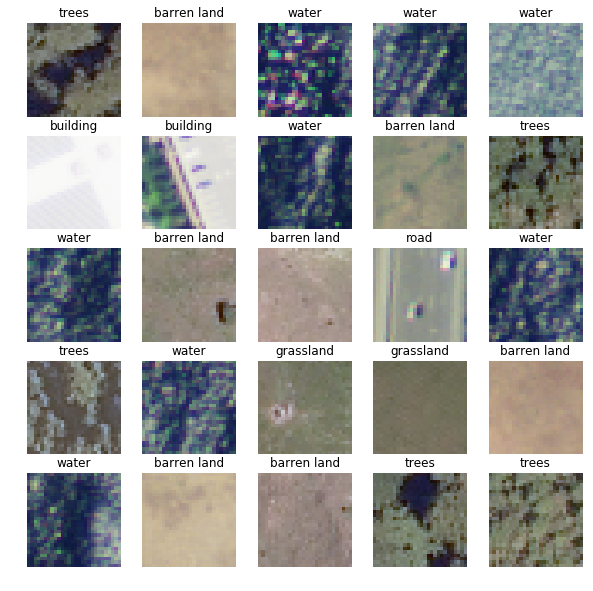

In [82]:
n = 5
plt.rcParams['figure.figsize'] = (2*n,2*n)
for i in range(n*n):
    plt.subplot(n,n,i+1)
    plt.imshow(train_x[:,:,0:3,i])
    plt.title(a[''.join(str(x) for x in train_y[:,i])])
    plt.axis('off')

In [83]:
test_x = mat['test_x']
test_y = mat['test_y']

In [88]:
x = np.transpose( train_x, (3,0,1,2))
x.shape

(324000, 28, 28, 4)

In [89]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 4)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.summary()

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_8/convolution' (op: 'Conv2D') with input shapes: [?,1,1,128], [3,3,128,128].